In [311]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve

In [312]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [313]:
classes = ['Acura RL Sedan 2012', 'Audi A5 Coupe 2012', 'Tesla Model S Sedan 2012']

In [314]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/images_dups/' + classes[i] + '/*.jpg')
    imageCount = 0
    for imgPath in imagePaths:
        if imageCount < 1000:
            imageCount += 1
            img = Image.open(imgPath).convert("RGB")
            img = img.resize((64, 64))
            img.load()
            data = np.asarray(img, dtype="int32")
            images.append(data)
            image_classes.append(i)

        
images = np.array(images)
image_classes = np.array(image_classes)

print(image_classes)

print(image_classes)
print(images.shape)
print(image_classes.shape)
print(len(classes))

[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]
(3000, 64, 64, 3)
(3000,)
3


In [315]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes)

In [316]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 64, 64, 3)
(750, 64, 64, 3)
(2250,)
(750,)


In [317]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (2250, 64, 64, 3)
y_train shape: (2250,)
x_test shape: (750, 64, 64, 3)
y_test shape: (750,)


Audi A5 Coupe 2012


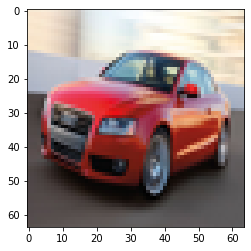

In [318]:
plt.imshow(x_train[0])
print(classes[y_train[0]])

In [319]:
# previous shape
print(y_train.shape)
print(y_test.shape)


(2250,)
(750,)


In [320]:
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))

In [321]:
# after shape
print(y_train.shape)
print(y_test.shape)

(2250, 3)
(750, 3)


In [322]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



print(x_train)
print(x_test)

[[[[0.972549   0.92156863 0.8392157 ]
   [0.96862745 0.9137255  0.827451  ]
   [0.96862745 0.91764706 0.83137256]
   ...
   [0.9647059  0.9411765  0.87058824]
   [0.9529412  0.92156863 0.84705883]
   [0.9372549  0.90588236 0.827451  ]]

  [[0.972549   0.9098039  0.81960785]
   [0.9764706  0.8980392  0.80784315]
   [0.9764706  0.89411765 0.8039216 ]
   ...
   [0.98039216 0.9411765  0.8627451 ]
   [0.9764706  0.9254902  0.8352941 ]
   [0.9647059  0.9137255  0.81960785]]

  [[0.9843137  0.9254902  0.8352941 ]
   [0.98039216 0.9137255  0.8156863 ]
   [0.9764706  0.9019608  0.8117647 ]
   ...
   [0.84705883 0.7607843  0.65882355]
   [0.8235294  0.7411765  0.64705884]
   [0.80784315 0.7254902  0.6313726 ]]

  ...

  [[0.3372549  0.3019608  0.30588236]
   [0.3372549  0.29803923 0.30588236]
   [0.32941177 0.30588236 0.3019608 ]
   ...
   [0.35686275 0.34901962 0.3529412 ]
   [0.36078432 0.3529412  0.35686275]
   [0.3647059  0.35686275 0.36078432]]

  [[0.3372549  0.30588236 0.3019608 ]
   [0.3

In [323]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)     

In [324]:
for layer in model.layers:
  layer.trainable = False

In [325]:

model.add(Flatten())
model.add(Dense(512))
model.add(Dense(512))
model.add(Dense(len(classes), activation="softmax"))

###### model.summary()

In [326]:
print(x_test.shape)
print(y_test.shape)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer="adam")

checkpointer = ModelCheckpoint(filepath="./best2.hdf5", verbose=0, save_best_only=True)

model.fit(x_train, y_train, epochs=1, verbose=1 ,callbacks=[monitor, checkpointer], validation_data=(x_test, y_test))

(750, 64, 64, 3)
(750, 3)
Train on 2250 samples, validate on 750 samples
2250/2250 [==============================] - 224s 100ms/sample - loss: 0.7886 - val_loss: 0.0083


In [327]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

Precision: 1.0
Recall : 1.0
Averaged F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       235
           2       1.00      1.00      1.00       251

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



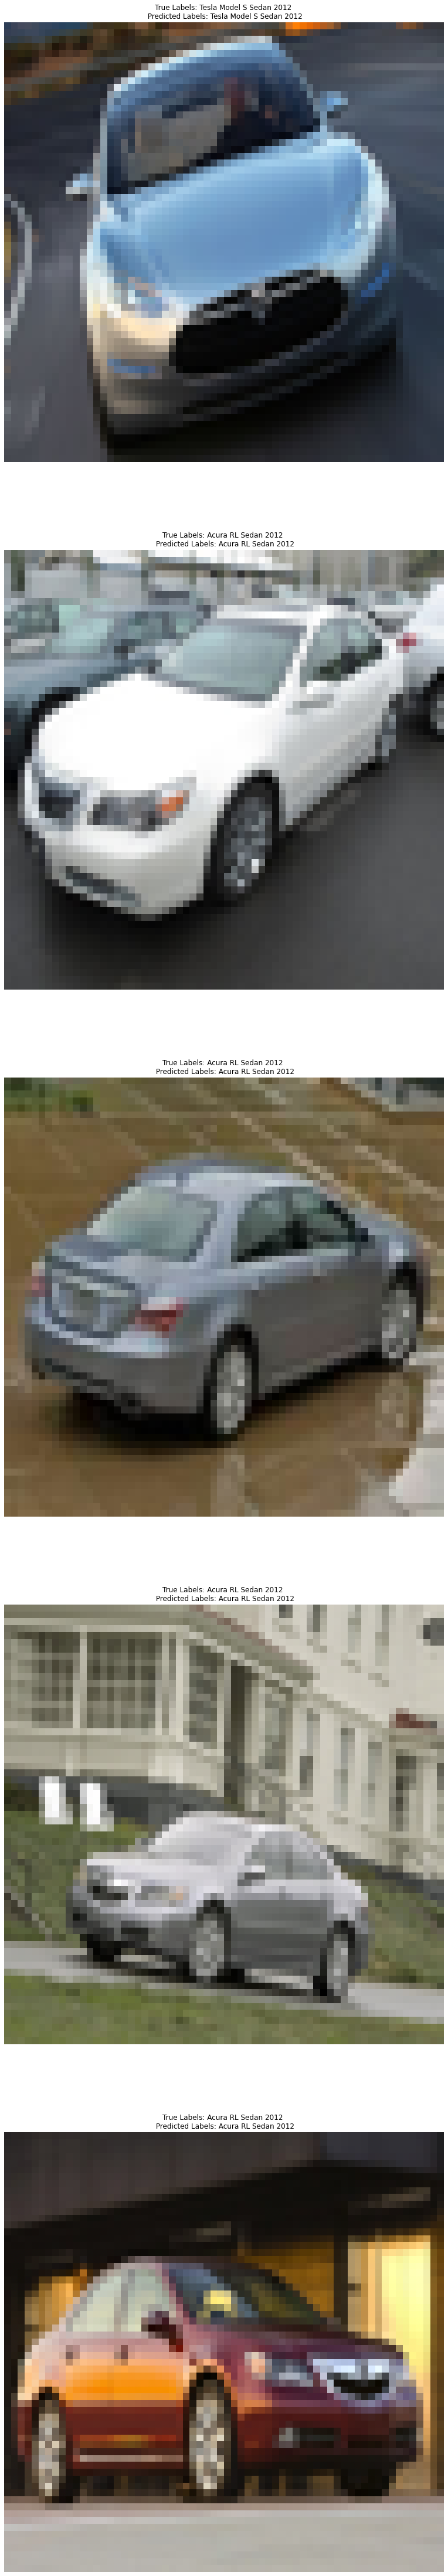

In [342]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))